<a href="https://colab.research.google.com/github/arduinojinarendra/arduino/blob/main/upto%20mid%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")
df

,Unnamed: 0,WindSpeed
0,2019-01-01 00:00:00+00:00,6.057610
1,2019-01-01 00:10:00+00:00,6.112440
2,2019-01-01 00:20:00+00:00,6.138910
3,2019-01-01 00:30:00+00:00,5.917395
4,2019-01-01 00:40:00+00:00,5.971805
...,...,...
26327,2019-07-02 19:50:00+00:00,9.641824
26328,2019-07-02 20:00:00+00:00,9.208314
26329,2019-07-02 20:10:00+00:00,10.032089
26330,2019-07-02 20:20:00+00:00,10.189664


from matplotlib import pyplot as plt
_df_0['WindSpeed'].plot(kind='hist', bins=20, title='WindSpeed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['WindSpeed'].plot(kind='line', figsize=(8, 4), title='WindSpeed')
plt.gca().spines[['top', 'right']].set_visible(False)

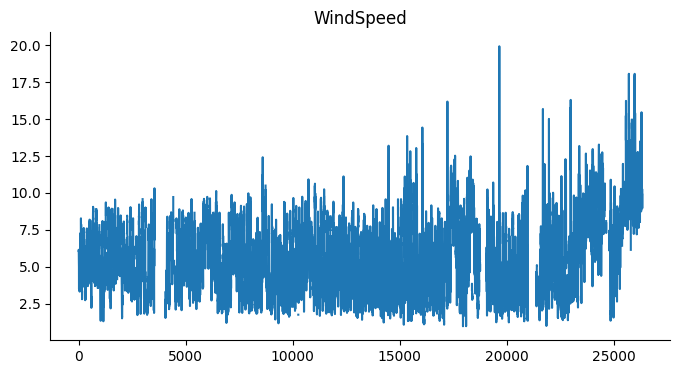

In [39]:
from matplotlib import pyplot as plt

# Assuming _df_1 is your DataFrame with the 'WindSpeed' column
_df_1['WindSpeed'].plot(kind='line', figsize=(8, 4), title='WindSpeed')
plt.gca().spines[['top', 'right']].set_visible(False)

# Save the graph as a PNG file
plt.savefig('wind_speed_plot.png')

# Finally, display the graph
plt.show()


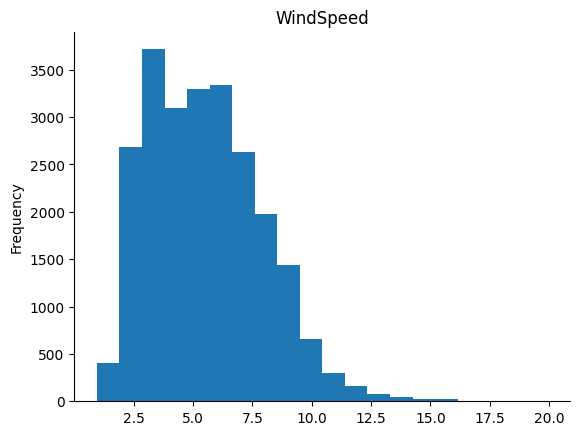

In [ ]:
from matplotlib import pyplot as plt
_df_0['WindSpeed'].plot(kind='hist', bins=20, title='WindSpeed')
plt.gca().spines[['top', 'right',]].set_visible(False)

Epoch 1/50
597/597 [==============================] - 11s 13ms/step - loss: 0.0031
Epoch 2/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0015
Epoch 3/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0013
Epoch 4/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 5/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 6/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 7/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 8/50
597/597 [==============================] - 10s 17ms/step - loss: 0.0012
Epoch 9/50
597/597 [==============================] - 9s 16ms/step - loss: 0.0012
Epoch 10/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 11/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 12/50
597/597 [==============================] - 15s 26ms/step - loss: 0.0012
Epoch 13/5

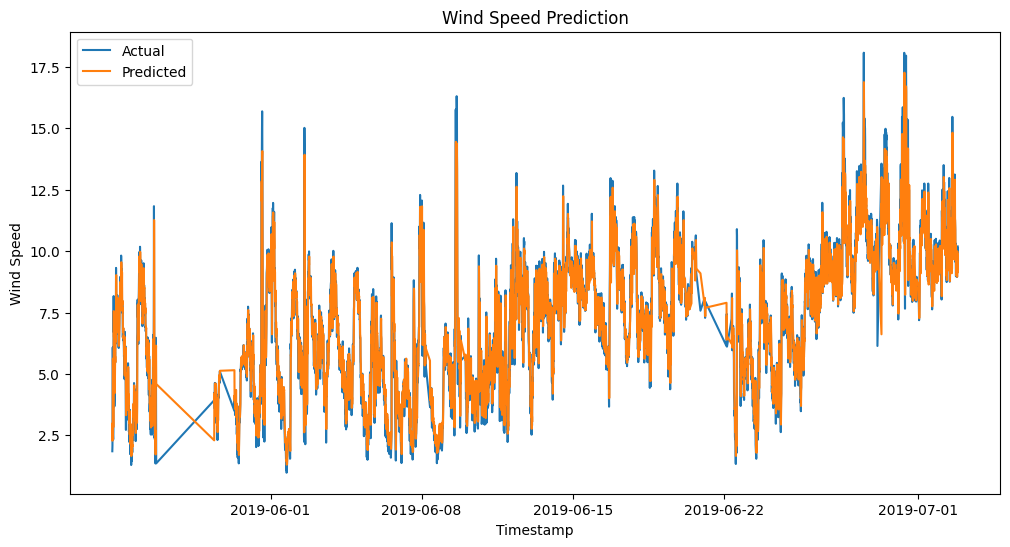

1/1 [==============================] - 0s 44ms/step
Hour 1: 9.863791465759277
Hour 2: 9.710285186767578
Hour 3: 9.54630184173584
Hour 4: 9.4060697555542
Hour 5: 9.283331871032715
Hour 6: 9.181533813476562
Hour 7: 9.093865394592285
Hour 8: 9.018258094787598
Hour 9: 8.951690673828125
Hour 10: 8.890491485595703
Hour 11: 8.834145545959473
Hour 12: 8.781900405883789
Hour 13: 8.731484413146973
Hour 14: 8.68117904663086
Hour 15: 8.632067680358887
Hour 16: 8.582962036132812
Hour 17: 8.53385066986084
Hour 18: 8.483382225036621
Hour 19: 8.43206787109375
Hour 20: 8.380053520202637
Hour 21: 8.327462196350098
Hour 22: 8.276504516601562
Hour 23: 8.226637840270996
Hour 24: 8.177963256835938


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()

# Make predictions for the next 24 hours on an hourly basis
future_predictions = []
last_sequence = X_test[-1]

for i in range(24):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    last_sequence = np.append(last_sequence[1:], prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0])

# Print hourly predictions for the next 24 hours
for i in range(24):
    print(f"Hour {i+1}: {future_predictions[i][0]}")


In [ ]:
################# RNN ######

Epoch 1/50
597/597 [==============================] - 6s 8ms/step - loss: 0.0034
Epoch 2/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0013
Epoch 3/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 4/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 5/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 6/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 7/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 8/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 9/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 10/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 11/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 12/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 13/50
597/597 [====

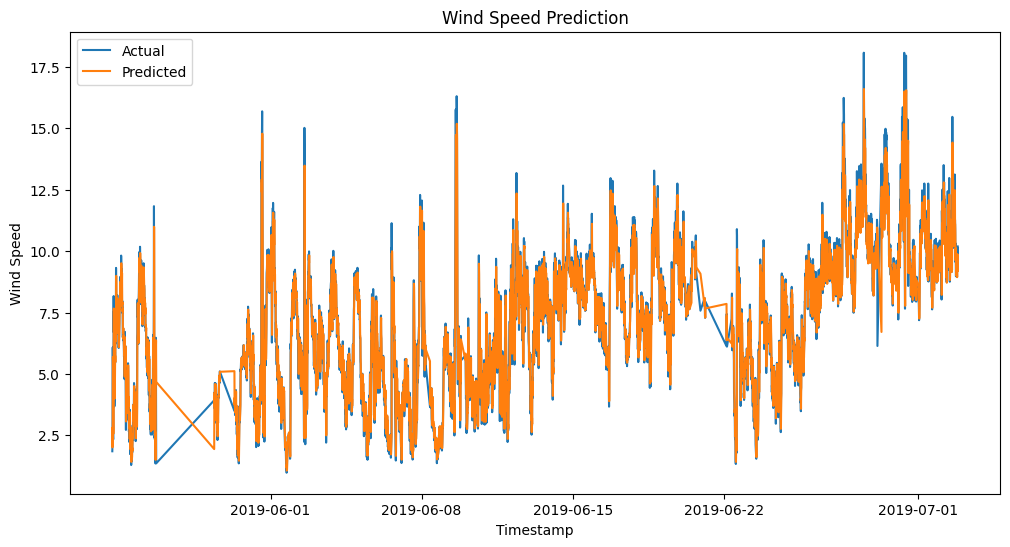

1/1 [==============================] - 0s 21ms/step
Hour 1: 9.817827224731445
Hour 2: 9.678033828735352
Hour 3: 9.571870803833008
Hour 4: 9.481162071228027
Hour 5: 9.384559631347656
Hour 6: 9.293289184570312
Hour 7: 9.217028617858887
Hour 8: 9.133367538452148
Hour 9: 9.059925079345703
Hour 10: 8.988550186157227
Hour 11: 8.919767379760742
Hour 12: 8.855565071105957
Hour 13: 8.794875144958496
Hour 14: 8.73581314086914
Hour 15: 8.679303169250488
Hour 16: 8.626260757446289
Hour 17: 8.574803352355957
Hour 18: 8.5260009765625
Hour 19: 8.478713035583496
Hour 20: 8.433905601501465
Hour 21: 8.390691757202148
Hour 22: 8.3493013381958
Hour 23: 8.309514999389648
Hour 24: 8.271239280700684


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()

# Make predictions for the next 24 hours on an hourly basis
future_predictions = []
last_sequence = X_test[-1]

for i in range(24):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    last_sequence = np.append(last_sequence[1:], prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0])

# Print hourly predictions for the next 24 hours
for i in range(24):
    print(f"Hour {i+1}: {future_predictions[i][0]}")


In [ ]:
##### CNNN ###

Epoch 1/50
597/597 [==============================] - 3s 4ms/step - loss: 0.0025
Epoch 2/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 3/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 4/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 5/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 6/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 7/50
597/597 [==============================] - 3s 5ms/step - loss: 0.0012
Epoch 8/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 9/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 10/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 11/50
597/597 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 12/50
597/597 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 13/50
597/597 [====

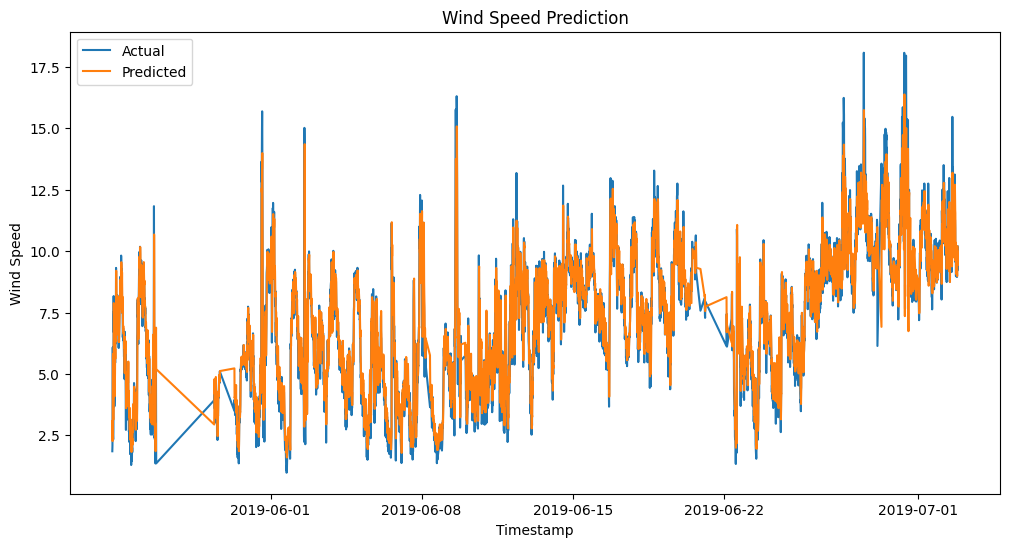

1/1 [==============================] - 0s 20ms/step
10 minutes 1: 9.970638275146484
10 minutes 2: 10.00605583190918
10 minutes 3: 9.838956832885742
10 minutes 4: 9.814115524291992
10 minutes 5: 9.660264015197754
10 minutes 6: 9.610960960388184
10 minutes 7: 9.579197883605957
10 minutes 8: 9.452445030212402
10 minutes 9: 9.453320503234863
10 minutes 10: 9.441384315490723
10 minutes 11: 9.446393013000488
10 minutes 12: 9.362554550170898
10 minutes 13: 9.342900276184082
10 minutes 14: 9.345808982849121
10 minutes 15: 9.363227844238281
10 minutes 16: 9.336673736572266
10 minutes 17: 9.356019020080566
10 minutes 18: 9.367287635803223
10 minutes 19: 9.364806175231934
10 minutes 20: 9.357172012329102
10 minutes 21: 9.368090629577637
10 minutes 22: 9.305462837219238
10 minutes 23: 9.285991668701172
10 minutes 24: 9.2359037399292
10 minutes 25: 9.210991859436035
10 minutes 26: 9.159379959106445
10 minutes 27: 9.141939163208008
10 minutes 28: 9.101208686828613
10 minutes 29: 9.08436393737793
10 

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()

# Make predictions for the next 24 hours on a 10-minute basis
future_predictions = []
last_sequence = X_test[-1]

for i in range(24 * 6):  # 24 hours * 6 (10-minute intervals)
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    last_sequence = np.append(last_sequence[1:], prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0])

# Print 10-minute predictions for the next 24 hours
for i in range(24 * 6):
    print(f"10 minutes {i+1}: {future_predictions[i][0]}")


Epoch 1/50
597/597 [==============================] - 3s 4ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 2/50
597/597 [==============================] - 3s 4ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 3/50
597/597 [==============================] - 3s 4ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 4/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 5/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 6/50
597/597 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 7/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/50
597/597 [==============================] - 3s 5ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 9/50
597/597 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 10/50
597/597 [==============================] - 2s 4ms/step - loss: 0.0013 - val_loss: 0.0025

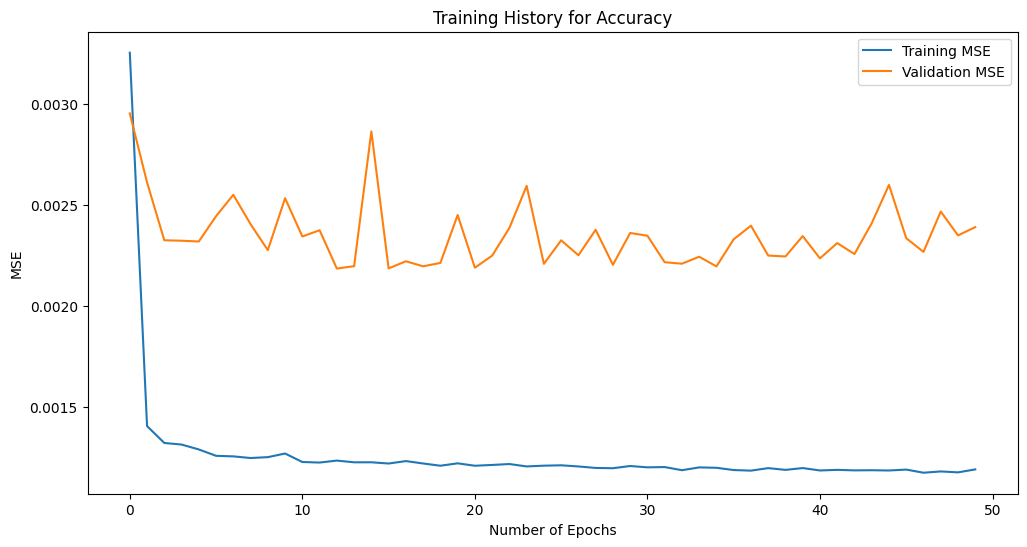

149/149 [==============================] - 0s 2ms/step
RMSE: 0.9282000340268202
R-squared (R2): 0.8939279256327327
MAE: 0.6590362918065735


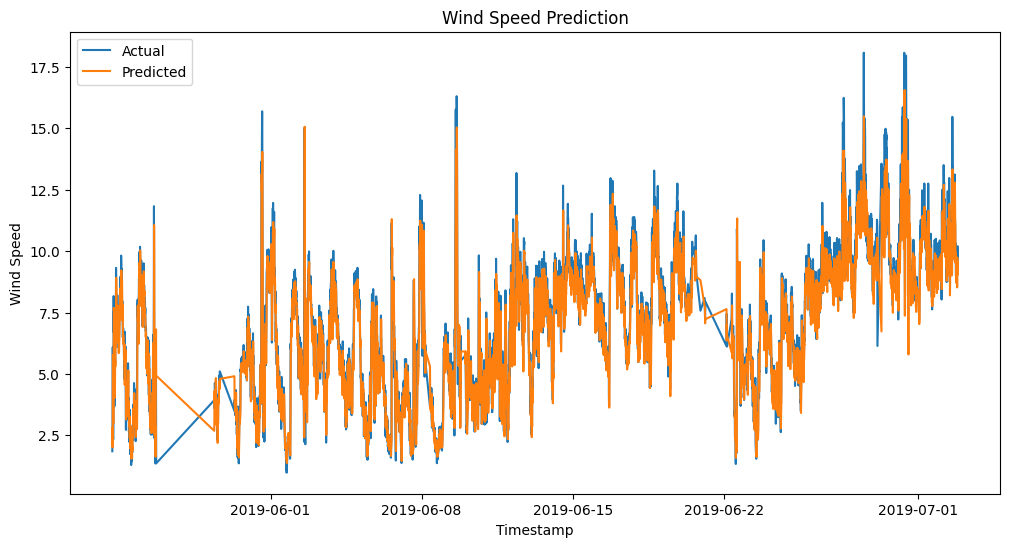

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training history for logging MSE
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history - Number of epochs vs MSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training History for Accuracy')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()


Epoch 1/50
597/597 [==============================] - 13s 18ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 2/50
597/597 [==============================] - 11s 18ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 3/50
597/597 [==============================] - 10s 17ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 4/50
597/597 [==============================] - 9s 15ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 5/50
597/597 [==============================] - 11s 18ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 6/50
597/597 [==============================] - 11s 18ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 7/50
597/597 [==============================] - 11s 18ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 8/50
597/597 [==============================] - 10s 17ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 9/50
597/597 [==============================] - 10s 16ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 10/50
597/597 [==============================] - 11s 18ms/step - loss: 0.0012

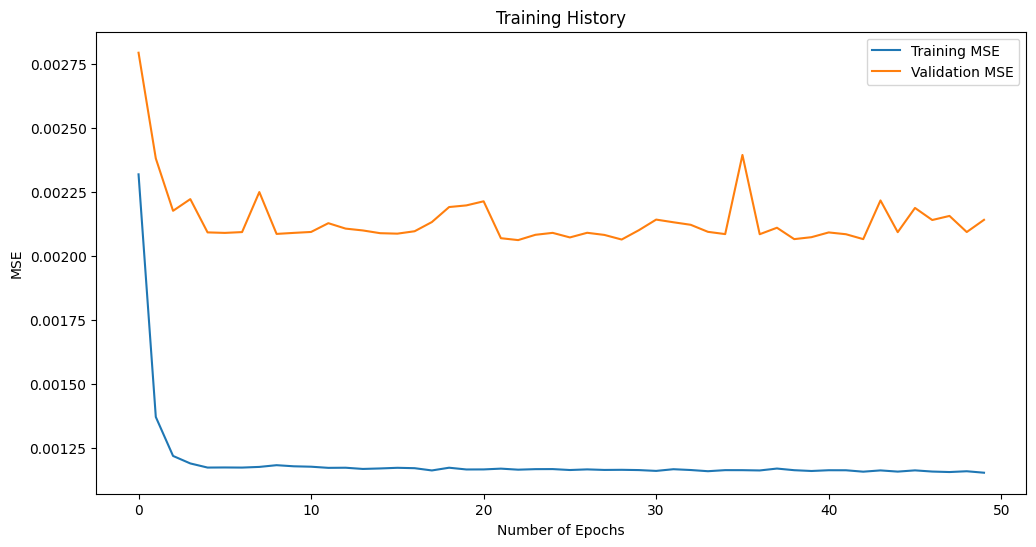

149/149 [==============================] - 1s 5ms/step
RMSE: 0.878344291091919
R-squared (R2): 0.9050166532663177
MAE: 0.6171510547597547


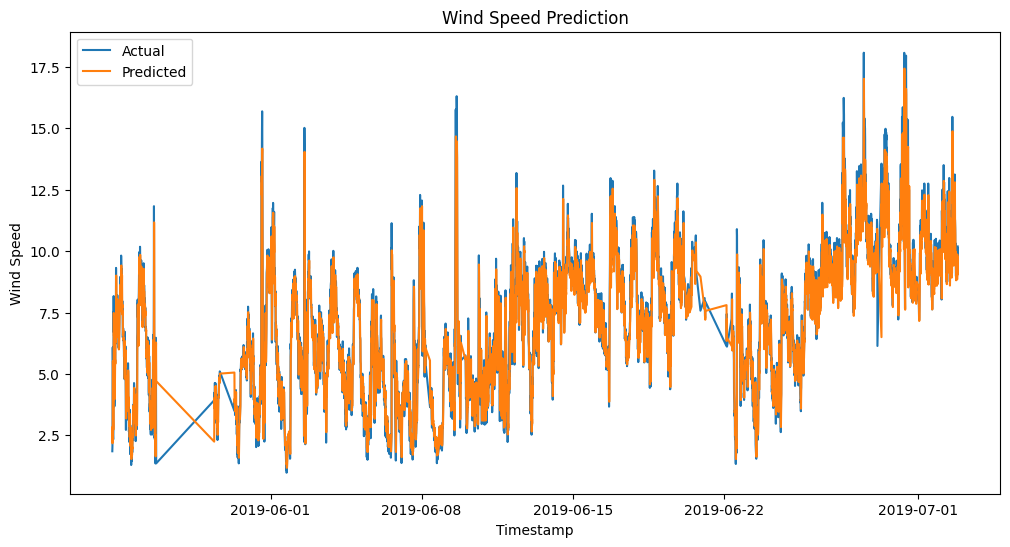

1/1 [==============================] - 0s 23ms/step
Hour 1: 9.741894721984863
Hour 2: 9.513115882873535
Hour 3: 9.269695281982422
Hour 4: 9.04021167755127
Hour 5: 8.821457862854004
Hour 6: 8.626176834106445
Hour 7: 8.447872161865234
Hour 8: 8.288128852844238
Hour 9: 8.145329475402832
Hour 10: 8.01458740234375
Hour 11: 7.896570205688477
Hour 12: 7.790882110595703
Hour 13: 7.693180561065674
Hour 14: 7.599578857421875
Hour 15: 7.5116705894470215
Hour 16: 7.426302909851074
Hour 17: 7.342707633972168
Hour 18: 7.257136344909668
Hour 19: 7.169679164886475
Hour 20: 7.079589366912842
Hour 21: 6.9863505363464355
Hour 22: 6.8943772315979
Hour 23: 6.8025431632995605
Hour 24: 6.711309909820557


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training history for logging MSE
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history - Number of epochs vs MSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training History')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()

# Make predictions for the next 24 hours on an hourly basis
future_predictions = []
last_sequence = X_test[-1]

for i in range(24):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    last_sequence = np.append(last_sequence[1:], prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0])

# Print hourly predictions for the next 24 hours
for i in range(24):
    print(f"Hour {i+1}: {future_predictions[i][0]}")


In [ ]:
###RNNN#####

Epoch 1/50
597/597 [==============================] - 9s 12ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 2/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 3/50
597/597 [==============================] - 8s 14ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 4/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 5/50
597/597 [==============================] - 5s 8ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 6/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 7/50
597/597 [==============================] - 5s 8ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 8/50
597/597 [==============================] - 6s 9ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 9/50
597/597 [==============================] - 5s 8ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 10/50
597/597 [==============================] - 5s 8ms/step - loss: 0.0012 - val_loss: 0.00

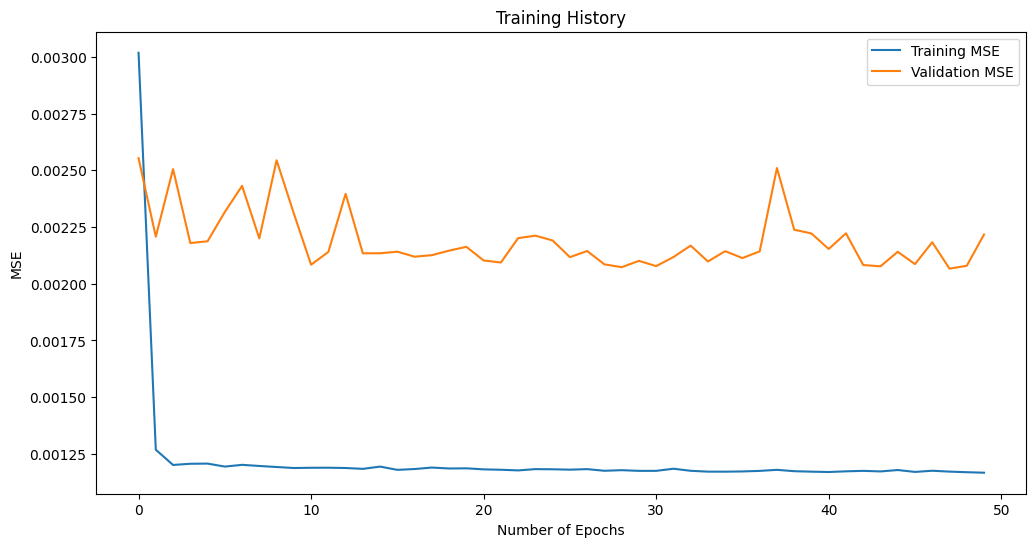

149/149 [==============================] - 1s 5ms/step
RMSE: 0.8938618432777385
R-squared (R2): 0.9016308996408238
MAE: 0.633728996132922


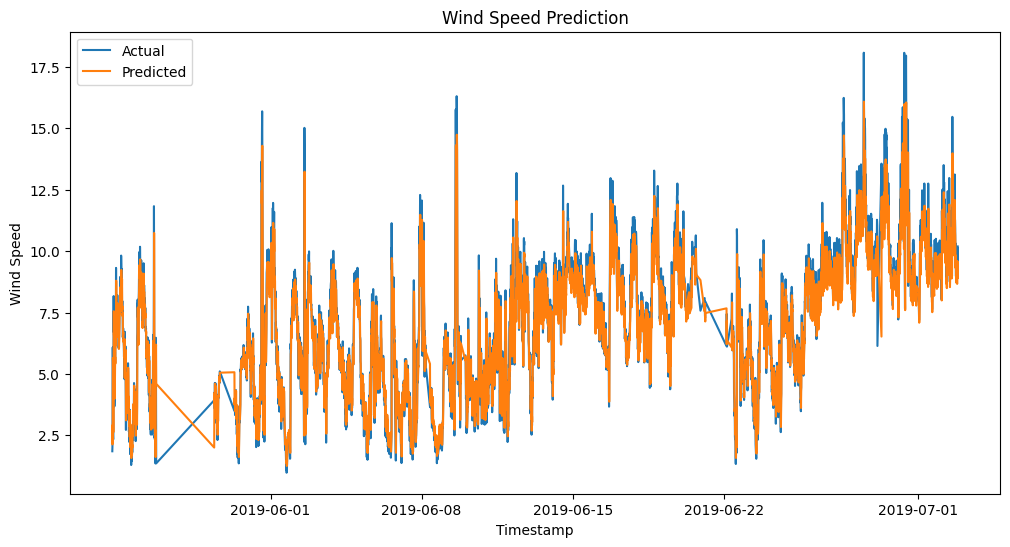

1/1 [==============================] - 0s 24ms/step
Hour 1: 9.536791801452637
Hour 2: 9.18309497833252
Hour 3: 8.861885070800781
Hour 4: 8.589835166931152
Hour 5: 8.339142799377441
Hour 6: 8.107427597045898
Hour 7: 7.901848793029785
Hour 8: 7.705411434173584
Hour 9: 7.526419639587402
Hour 10: 7.359956741333008
Hour 11: 7.201601028442383
Hour 12: 7.055900573730469
Hour 13: 6.919305324554443
Hour 14: 6.791440486907959
Hour 15: 6.674401760101318
Hour 16: 6.566564083099365
Hour 17: 6.467639923095703
Hour 18: 6.375763893127441
Hour 19: 6.289763450622559
Hour 20: 6.20872163772583
Hour 21: 6.131424427032471
Hour 22: 6.058785915374756
Hour 23: 5.990056037902832
Hour 24: 5.92494535446167


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training history for logging MSE
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot the training history - Number of epochs vs MSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Training History')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()

# Make predictions for the next 24 hours on an hourly basis
future_predictions = []
last_sequence = X_test[-1]

for i in range(24):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    last_sequence = np.append(last_sequence[1:], prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0])

# Print hourly predictions for the next 24 hours
for i in range(24):
    print(f"Hour {i+1}: {future_predictions[i][0]}")


Epoch 1/50
597/597 [==============================] - 7s 9ms/step - loss: 0.0017
Epoch 2/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 3/50
597/597 [==============================] - 5s 8ms/step - loss: 0.0012
Epoch 4/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 5/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 6/50
597/597 [==============================] - 6s 10ms/step - loss: 0.0012
Epoch 7/50
597/597 [==============================] - 5s 8ms/step - loss: 0.0012
Epoch 8/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 9/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 10/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 11/50
597/597 [==============================] - 4s 7ms/step - loss: 0.0012
Epoch 12/50
597/597 [==============================] - 5s 9ms/step - loss: 0.0012
Epoch 13/50
597/597 [===

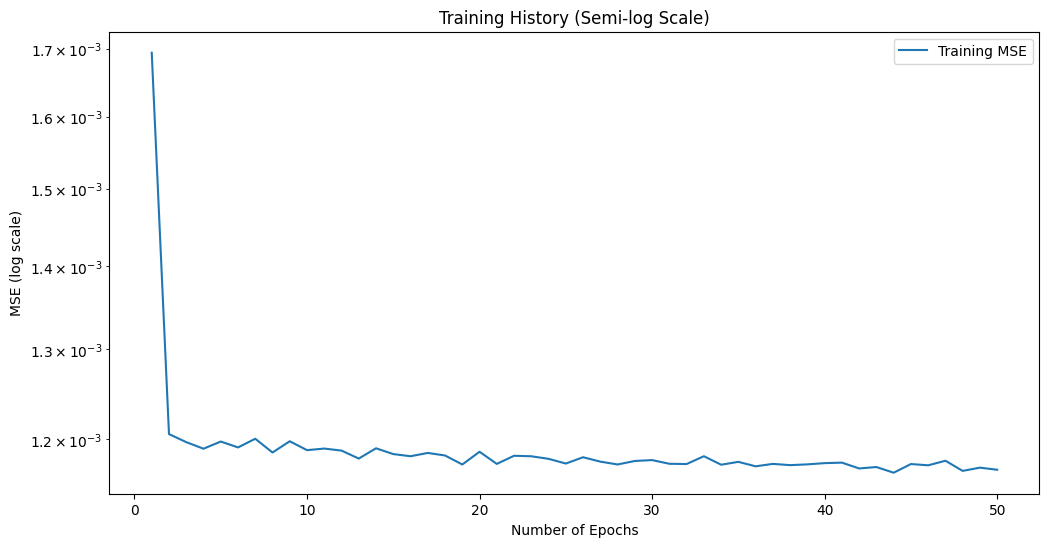

149/149 [==============================] - 1s 4ms/step
RMSE: 0.8925144014340661
R-squared (R2): 0.9019272468671482
MAE: 0.6312103335950093


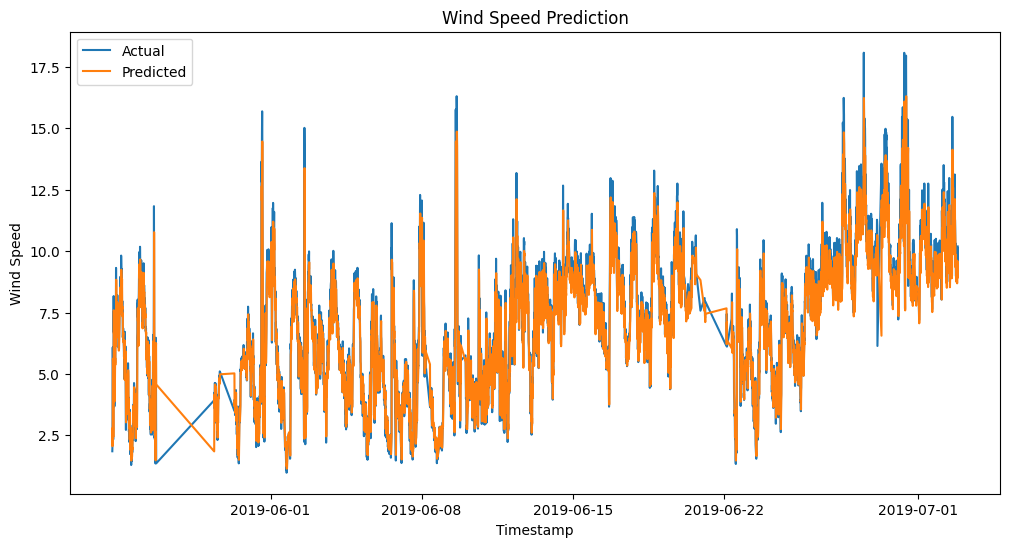

1/1 [==============================] - 0s 28ms/step
Hour 1: 9.542490005493164
Hour 2: 9.219324111938477
Hour 3: 8.920522689819336
Hour 4: 8.653199195861816
Hour 5: 8.39912223815918
Hour 6: 8.175444602966309
Hour 7: 7.961633682250977
Hour 8: 7.75210428237915
Hour 9: 7.563087463378906
Hour 10: 7.379025936126709
Hour 11: 7.205095291137695
Hour 12: 7.04469633102417
Hour 13: 6.8925251960754395
Hour 14: 6.750706195831299
Hour 15: 6.615966320037842
Hour 16: 6.48714017868042
Hour 17: 6.365265369415283
Hour 18: 6.247978210449219
Hour 19: 6.137331485748291
Hour 20: 6.032525062561035
Hour 21: 5.932781219482422
Hour 22: 5.838831424713135
Hour 23: 5.749422073364258
Hour 24: 5.664006233215332


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 24  # Choose an appropriate sequence length

X_train = create_sequences(train_scaled, seq_length)
y_train = train_scaled[seq_length:]
X_test = create_sequences(test_scaled, seq_length)
y_test = test_scaled[seq_length:]

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training history for logging MSE
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Plot the training history - Number of epochs vs MSE on a semi-log scale
plt.figure(figsize=(12, 6))
plt.semilogy(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training MSE')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.title('Training History (Semi-log Scale)')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled values to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared (R2): {r2}")
print(f"MAE: {mae}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Wind Speed Prediction')
plt.show()

# Make predictions for the next 24 hours on an hourly basis
future_predictions = []
last_sequence = X_test[-1]

for i in range(24):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    last_sequence = np.append(last_sequence[1:], prediction)
    future_predictions.append(scaler.inverse_transform(prediction)[0])

# Print hourly predictions for the next 24 hours
for i in range(24):
    print(f"Hour {i+1}: {future_predictions[i][0]}")


Epoch 1/50
597/597 [==============================] - 3s 4ms/step - loss: 0.0234 - val_loss: 0.0181
Epoch 2/50
597/597 [==============================] - 2s 3ms/step - loss: 0.0030 - val_loss: 4.4395e-04
Epoch 3/50
597/597 [==============================] - 2s 3ms/step - loss: 4.0578e-04 - val_loss: 8.3259e-04
Epoch 4/50
597/597 [==============================] - 2s 3ms/step - loss: 3.2415e-04 - val_loss: 8.7139e-04
Epoch 5/50
597/597 [==============================] - 2s 3ms/step - loss: 3.1234e-04 - val_loss: 8.4511e-04
Epoch 6/50
597/597 [==============================] - 2s 4ms/step - loss: 3.0911e-04 - val_loss: 8.8861e-04
Epoch 7/50
597/597 [==============================] - 2s 4ms/step - loss: 3.0968e-04 - val_loss: 8.6825e-04
Epoch 8/50
597/597 [==============================] - 3s 5ms/step - loss: 3.0754e-04 - val_loss: 9.6935e-04
Epoch 9/50
597/597 [==============================] - 4s 7ms/step - loss: 3.0915e-04 - val_loss: 9.2922e-04
Epoch 10/50
597/597 [===================

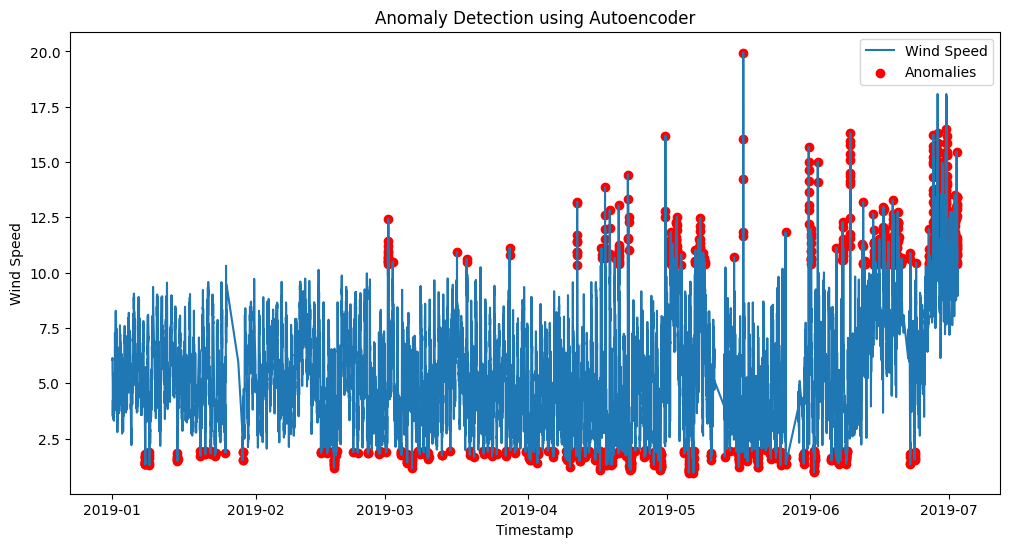

Anomalies:
                           WindSpeed
Timestamp                           
2019-01-08 02:00:00+00:00   1.804200
2019-01-08 02:10:00+00:00   1.683200
2019-01-08 02:20:00+00:00   1.730710
2019-01-08 02:30:00+00:00   1.400033
2019-01-08 02:40:00+00:00   1.685083
...                              ...
2019-07-02 16:50:00+00:00  10.489481
2019-07-02 17:00:00+00:00  13.119383
2019-07-02 17:10:00+00:00  11.319819
2019-07-02 17:20:00+00:00  11.250529
2019-07-02 17:30:00+00:00  10.903114

[1194 rows x 1 columns]


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import regularizers

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Define an Autoencoder model
input_dim = df.shape[1]  # Number of features
encoding_dim = 16  # Size of the encoded representation

model = Sequential()
model.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))
model.add(Dense(input_dim, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder
model.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Calculate the reconstruction errors
reconstructed_data = model.predict(scaled_data)
reconstruction_errors = np.mean(np.square(scaled_data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile as needed

# Identify anomalies
anomalies = df[reconstruction_errors > threshold]

# Visualize the anomalies (if needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['WindSpeed'], label='Wind Speed')
plt.scatter(anomalies.index, anomalies['WindSpeed'], c='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.legend()
plt.title('Anomaly Detection using Autoencoder')
plt.show()

# Print the anomalies
print("Anomalies:")
print(anomalies)


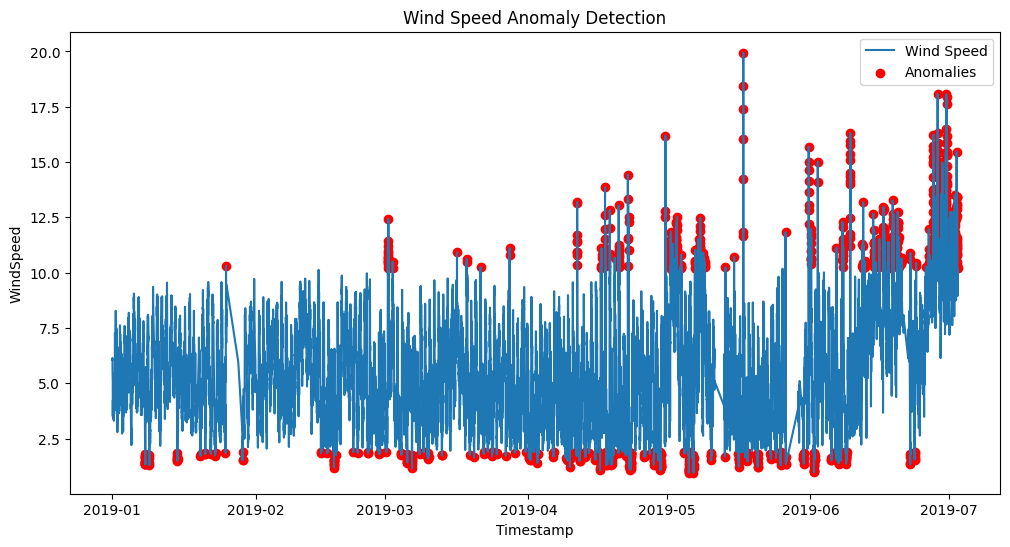

Anomalies:
                           WindSpeed  Anomaly_Score
Timestamp                                          
2019-01-08 02:00:00+00:00   1.804200             -1
2019-01-08 02:10:00+00:00   1.683200             -1
2019-01-08 02:20:00+00:00   1.730710             -1
2019-01-08 02:30:00+00:00   1.400033             -1
2019-01-08 02:40:00+00:00   1.685083             -1
...                              ...            ...
2019-07-02 17:10:00+00:00  11.319819             -1
2019-07-02 17:20:00+00:00  11.250529             -1
2019-07-02 17:30:00+00:00  10.903114             -1
2019-07-02 18:00:00+00:00  10.309539             -1
2019-07-02 20:20:00+00:00  10.189664             -1

[1191 rows x 2 columns]


In [43]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Define the feature you want to detect anomalies in
feature = 'WindSpeed'

# Extract the feature values
data = df[[feature]].values

# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.05)  # You can adjust the contamination parameter
model.fit(data)

# Predict the anomalies (1 for inliers, -1 for outliers)
anomaly_scores = model.predict(data)

# Create a new column in the DataFrame to store the anomaly scores
df['Anomaly_Score'] = anomaly_scores

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Wind Speed')
plt.scatter(df.index[df['Anomaly_Score'] == -1], df[feature][df['Anomaly_Score'] == -1], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel(feature)
plt.legend()
plt.title('Wind Speed Anomaly Detection')
plt.show()

# Display the rows with anomalies
anomalies = df[df['Anomaly_Score'] == -1]
print("Anomalies:")
print(anomalies)


In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Scale the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Train an Isolation Forest model
clf = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
clf.fit(df_scaled)

# Predict outliers
outliers = clf.predict(df_scaled)
anomalies = df[outliers == -1]

# Display anomalies
print(anomalies)


                           WindSpeed
Timestamp                           
2019-01-08 02:00:00+00:00   1.804200
2019-01-08 02:10:00+00:00   1.683200
2019-01-08 02:20:00+00:00   1.730710
2019-01-08 02:30:00+00:00   1.400033
2019-01-08 02:40:00+00:00   1.685083
...                              ...
2019-07-02 17:00:00+00:00  13.119383
2019-07-02 17:10:00+00:00  11.319819
2019-07-02 17:20:00+00:00  11.250529
2019-07-02 17:30:00+00:00  10.903114
2019-07-02 18:00:00+00:00  10.309539

[1190 rows x 1 columns]


Epoch 1/50
747/747 [==============================] - 2s 2ms/step - loss: 0.0217
Epoch 2/50
747/747 [==============================] - 1s 2ms/step - loss: 8.2807e-04
Epoch 3/50
747/747 [==============================] - 2s 3ms/step - loss: 3.8735e-04
Epoch 4/50
747/747 [==============================] - 2s 2ms/step - loss: 3.7608e-04
Epoch 5/50
747/747 [==============================] - 1s 2ms/step - loss: 3.7378e-04
Epoch 6/50
747/747 [==============================] - 1s 2ms/step - loss: 3.7340e-04
Epoch 7/50
747/747 [==============================] - 3s 3ms/step - loss: 3.7497e-04
Epoch 8/50
747/747 [==============================] - 2s 3ms/step - loss: 3.7476e-04
Epoch 9/50
747/747 [==============================] - 4s 5ms/step - loss: 3.7501e-04
Epoch 10/50
747/747 [==============================] - 3s 5ms/step - loss: 3.7408e-04
Epoch 11/50
747/747 [==============================] - 4s 5ms/step - loss: 3.7522e-04
Epoch 12/50
747/747 [==============================] - 4s 5ms/step 

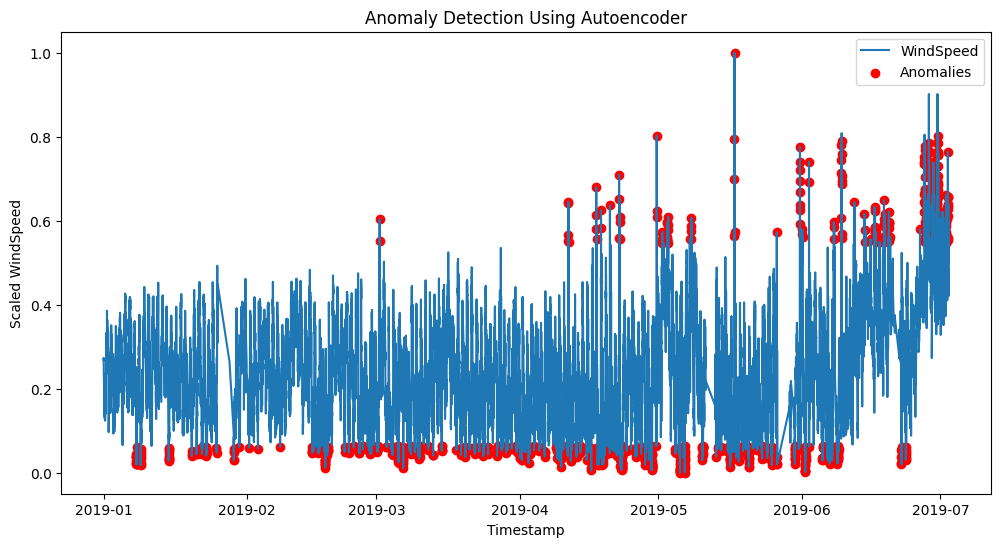

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Read the CSV file
df = pd.read_csv("/content/Filtered_WindSpeed_Data.csv")

# Preprocessing data
df['Timestamp'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Timestamp')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()

# Scale the data
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

# Define the autoencoder model
input_layer = Input(shape=(data.shape[1],))
encoded = Dense(32, activation='relu')(input_layer)  # Encoder
decoded = Dense(data.shape[1], activation='sigmoid')(encoded)  # Decoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder using normal data
train_data = data  # Use non-anomalous data for training
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, shuffle=True)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(train_data - autoencoder.predict(train_data)), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)  # Example: 95th percentile

# Detect anomalies
anomalies = np.where(reconstruction_errors > threshold)[0]

# Plot the data and highlight anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, data, label='WindSpeed')
plt.scatter(df.index[anomalies], data[anomalies], color='red', label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Scaled WindSpeed')
plt.legend()
plt.title('Anomaly Detection Using Autoencoder')
plt.show()
